# PROJET 03 : TRAITEMENT DE DONNEES NUTRITIONELLES - Suite 02/04

# Importation des librairies necessaires au projet

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#from langdetect import detect
#import re
#import langdetect
#from langdetect import detect
#from langdetect import detect_langs
%matplotlib inline
#To show all rows and colum
#pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)

# Identification des valeurs aberrantes dans le data set.

In [2]:
df3 = pd.read_csv('df3.csv')

C:\Users\AMC\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (0,18,19,20,25,26,27,28,35) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
df3.head(2)

,code,url,creator,created_datetime,last_modified_datetime,product_name,quantity,packaging,packaging_tags,brands,...,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
0,3087,http://world-fr.openfoodfacts.org/produit/0000...,openfoodfacts-contributors,2016-09-17 09:17:46+00:00,2016-09-17 09:18:13+00:00,Farine de blé noir,1kg,NaN,NaN,Ferme t'y R'nao,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4530,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,2017-03-09 14:32:37+00:00,2017-03-09 14:32:37+00:00,Banana Chips Sweetened (Whole),NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0,14.0


In [4]:
df3.shape

(303001, 135)

In [6]:
df3.describe()

,additives_n,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,caprylic-acid_100g,capric-acid_100g,lauric-acid_100g,...,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
count,247023.000000,247023.000000,247023.000000,2.577260e+05,826.000000,240539.000000,226604.000000,1.0,2.000000,4.000000,...,247.000000,78.000000,29.000000,49.000000,3032.000000,164.000000,943.000000,268.000000,218427.000000,218427.000000
mean,1.937589,0.018929,0.055035,1.140474e+03,574.031162,12.700640,5.114914,7.4,6.040000,36.136182,...,0.000446,1.594563,0.145762,6.425698,31.489865,15.414634,49.544221,341.700764,9.150751,9.043387
std,2.503673,0.137959,0.268774,6.485011e+03,698.816685,17.573113,8.006740,NaN,0.226274,24.101433,...,0.001313,6.475588,0.172312,2.047841,31.975718,3.764383,18.704388,425.211439,9.052909,9.181334
min,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,7.4,5.880000,0.044730,...,0.000000,0.000000,0.001800,0.000000,0.000000,8.000000,6.000000,0.000000,-15.000000,-15.000000
25%,0.000000,0.000000,0.000000,3.730000e+02,46.300000,0.000000,0.000000,7.4,5.960000,34.661183,...,0.000015,0.015500,0.035000,6.300000,0.000000,12.000000,32.000000,98.750000,1.000000,1.000000
50%,1.000000,0.000000,0.000000,1.100000e+03,300.000000,5.000000,1.790000,7.4,6.040000,47.600000,...,0.000035,0.021000,0.039000,7.200000,23.000000,15.000000,50.000000,195.750000,10.000000,9.000000
75%,3.000000,0.000000,0.000000,1.674000e+03,896.000000,20.000000,7.140000,7.4,6.120000,49.075000,...,0.000103,0.043000,0.400000,7.400000,51.000000,15.000000,64.000000,383.200000,16.000000,16.000000
max,31.000000,2.000000,6.000000,3.251373e+06,3740.000000,714.290000,550.000000,7.4,6.200000,49.300000,...,0.014700,42.280000,0.423000,8.400000,100.000000,25.000000,100.000000,2842.000000,40.000000,40.000000


In [7]:
df3_stat = df3.describe().T

In [8]:
df3_stat

,count,mean,std,min,25%,50%,75%,max
additives_n,247023.0,1.937589,2.503673,0.0,0.00,1.00,3.0,31.0
ingredients_from_palm_oil_n,247023.0,0.018929,0.137959,0.0,0.00,0.00,0.0,2.0
ingredients_that_may_be_from_palm_oil_n,247023.0,0.055035,0.268774,0.0,0.00,0.00,0.0,6.0
energy_100g,257726.0,1140.474085,6485.011180,0.0,373.00,1100.00,1674.0,3251373.0
energy-from-fat_100g,826.0,574.031162,698.816685,0.0,46.30,300.00,896.0,3740.0
...,...,...,...,...,...,...,...,...
collagen-meat-protein-ratio_100g,164.0,15.414634,3.764383,8.0,12.00,15.00,15.0,25.0
cocoa_100g,943.0,49.544221,18.704388,6.0,32.00,50.00,64.0,100.0
carbon-footprint_100g,268.0,341.700764,425.211439,0.0,98.75,195.75,383.2,2842.0
nutrition-score-fr_100g,218427.0,9.150751,9.052909,-15.0,1.00,10.00,16.0,40.0


In [9]:
pd.options.display.max_rows = None
df3_stat

,count,mean,std,min,25%,50%,75%,max
additives_n,247023.0,1.937589,2.503673,0.000000,0.000000e+00,1.000000,3.000000,3.100000e+01
ingredients_from_palm_oil_n,247023.0,0.018929,0.137959,0.000000,0.000000e+00,0.000000,0.000000,2.000000e+00
ingredients_that_may_be_from_palm_oil_n,247023.0,0.055035,0.268774,0.000000,0.000000e+00,0.000000,0.000000,6.000000e+00
energy_100g,257726.0,1140.474085,6485.011180,0.000000,3.730000e+02,1100.000000,1674.000000,3.251373e+06
energy-from-fat_100g,826.0,574.031162,698.816685,0.000000,4.630000e+01,300.000000,896.000000,3.740000e+03
fat_100g,240539.0,12.700640,17.573113,0.000000,0.000000e+00,5.000000,20.000000,7.142900e+02
saturated-fat_100g,226604.0,5.114914,8.006740,0.000000,0.000000e+00,1.790000,7.140000,5.500000e+02
caprylic-acid_100g,1.0,7.400000,NaN,7.400000,7.400000e+00,7.400000,7.400000,7.400000e+00
capric-acid_100g,2.0,6.040000,0.226274,5.880000,5.960000e+00,6.040000,6.120000,6.200000e+00
lauric-acid_100g,4.0,36.136182,24.101433,0.044730,3.466118e+01,47.600000,49.075000,4.930000e+01


In [10]:
# Identification et traitement des outliers et des colonnes vides
# Les colonnes vides dans le df3 sont le resultat du nettoyage des ligne effectues precedemment.

In [11]:
df3_stat.columns

Index(['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max'], dtype='object')

In [12]:
df3_stat[df3_stat['count']==0]

,count,mean,std,min,25%,50%,75%,max
behenic-acid_100g,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
dihomo-gamma-linolenic-acid_100g,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gondoic-acid_100g,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
# Suppression des colonnes completement nulles

In [14]:
df3.drop(['behenic-acid_100g','dihomo-gamma-linolenic-acid_100g','gondoic-acid_100g'],axis=1,inplace=True)

In [15]:
df3.shape

(303001, 132)

In [ ]:
# Remplissage des valeurs manquantes de '0' pour l'ensemble des colonnes numeriques exceptes celles du nutri-score 
# Traitement des outliers : 
# La valeur min de chaque colonne ne doit pas etre negative sauf pour les colonnes du nutri-score

In [ ]:
# Remplacement des valeurs manquantes par des '0' pour eviter des erreurs liees aux valeurs NaN

In [16]:
# Utilisation d'une list predefinie pour appliquer le remplissage des valeurs manquantes 
col_fill = ['additives_n','ingredients_from_palm_oil_n','ingredients_that_may_be_from_palm_oil_n','energy_100g','energy-from-fat_100g','fat_100g','saturated-fat_100g','caprylic-acid_100g','capric-acid_100g','lauric-acid_100g','myristic-acid_100g','palmitic-acid_100g','stearic-acid_100g','arachidic-acid_100g','montanic-acid_100g','monounsaturated-fat_100g','polyunsaturated-fat_100g','omega-3-fat_100g','alpha-linolenic-acid_100g','eicosapentaenoic-acid_100g','docosahexaenoic-acid_100g','omega-6-fat_100g','linoleic-acid_100g','arachidonic-acid_100g','gamma-linolenic-acid_100g','omega-9-fat_100g','oleic-acid_100g','trans-fat_100g','cholesterol_100g','carbohydrates_100g','sugars_100g','sucrose_100g','glucose_100g','fructose_100g','lactose_100g','maltose_100g','maltodextrins_100g','starch_100g','polyols_100g','fiber_100g','proteins_100g','casein_100g','serum-proteins_100g','nucleotides_100g','salt_100g','sodium_100g','alcohol_100g','vitamin-a_100g','beta-carotene_100g','vitamin-d_100g','vitamin-e_100g','vitamin-k_100g','vitamin-c_100g','vitamin-b1_100g','vitamin-b2_100g','vitamin-pp_100g','vitamin-b6_100g','vitamin-b9_100g','folates_100g','vitamin-b12_100g','biotin_100g','pantothenic-acid_100g','silica_100g','bicarbonate_100g','potassium_100g','chloride_100g','calcium_100g','phosphorus_100g','iron_100g','magnesium_100g','zinc_100g','copper_100g','manganese_100g','fluoride_100g','selenium_100g','chromium_100g','molybdenum_100g','iodine_100g','caffeine_100g','taurine_100g','ph_100g','fruits-vegetables-nuts_100g','collagen-meat-protein-ratio_100g','cocoa_100g','carbon-footprint_100g']
df3[col_fill]=df3[col_fill].fillna(0)

In [17]:
df4 = df3[col_fill]

In [18]:
# Boucle pour la detection des outliers au niveau des colonnes des compositions des ingredients
# Specification du format d'affichafe des valeurs en format; 'float'
pd.set_option('display.float_format', lambda x: '%0.2f' % x)
d=[]
for i in df4.columns :
    if df4[i].min() <0:
        x = df4[i].min()
        y = (df4[i]<0).sum()
        z = df4[i].dtypes
        w = df4[i].max()
        o = df4[i].mean()
        note = 'Negative value'
       
    
    elif df4[i].max()>100 :
        x = df4[i].min()
        y = (df4[i]>100).sum()
        z = df4[i].dtypes
        w = df4[i].max()
        o = df4[i].mean()
        note = 'excessive value'
    
    else :
        x = df4[i].min()
        y = 0
        z = df4[i].dtypes
        w = df4[i].max()
        o = df4[i].mean()
        note = 'No issues'
    
    d.append(
        {
            'variable':i,
            'outliers type':note,
            'Min_':x,
            'Mean':o,
            'Max_':w,
            'Outliers_count':y,
            'dtype' : z                        
        }
    )
k=pd.DataFrame(d)
k

,variable,outliers type,Min_,Mean,Max_,Outliers_count,dtype
0,additives_n,No issues,0.00,1.58,31.00,0,float64
1,ingredients_from_palm_oil_n,No issues,0.00,0.02,2.00,0,float64
2,ingredients_that_may_be_from_palm_oil_n,No issues,0.00,0.04,6.00,0,float64
3,energy_100g,excessive value,0.00,970.06,3251373.00,239877,float64
4,energy-from-fat_100g,excessive value,0.00,1.56,3740.00,541,float64
5,fat_100g,excessive value,0.00,10.08,714.29,4,float64
6,saturated-fat_100g,excessive value,0.00,3.83,550.00,3,float64
7,caprylic-acid_100g,No issues,0.00,0.00,7.40,0,float64
8,capric-acid_100g,No issues,0.00,0.00,6.20,0,float64
9,lauric-acid_100g,No issues,0.00,0.00,49.30,0,float64


In [19]:
# Identification de l'ensemble des outliers 
k[(k['Min_']<0)|(k['Max_']>100)]

,variable,outliers type,Min_,Mean,Max_,Outliers_count,dtype
3,energy_100g,excessive value,0.00,970.06,3251373.00,239877,float64
4,energy-from-fat_100g,excessive value,0.00,1.56,3740.00,541,float64
5,fat_100g,excessive value,0.00,10.08,714.29,4,float64
6,saturated-fat_100g,excessive value,0.00,3.83,550.00,3,float64
15,monounsaturated-fat_100g,excessive value,0.00,0.78,557.14,1,float64
27,trans-fat_100g,Negative value,-3.57,0.03,369.00,4,float64
29,carbohydrates_100g,excessive value,0.00,25.44,2916.67,18,float64
30,sugars_100g,Negative value,-17.86,12.77,3520.00,7,float64
33,fructose_100g,excessive value,0.00,0.00,101.00,1,float64
39,fiber_100g,Negative value,-6.70,1.88,5380.00,1,float64


In [20]:
# Les outliers sont au niveau des colonnes a valeurs excessives et/ou negatives :
print(' List of outliers in numerical dataframe''s columns   : ')
k['outliers type'].value_counts()

 List of outliers in numerical dataframes columns   : 


No issues          60
excessive value    16
Negative value      9
Name: outliers type, dtype: int64

In [21]:
# On filtre uniquement les colonnes qui contiennent des outliers : 

In [23]:
k[(k['outliers type']=='excessive value')|(k['outliers type']=='Negative value')]

,variable,outliers type,Min_,Mean,Max_,Outliers_count,dtype
3,energy_100g,excessive value,0.00,970.06,3251373.00,239877,float64
4,energy-from-fat_100g,excessive value,0.00,1.56,3740.00,541,float64
5,fat_100g,excessive value,0.00,10.08,714.29,4,float64
6,saturated-fat_100g,excessive value,0.00,3.83,550.00,3,float64
15,monounsaturated-fat_100g,excessive value,0.00,0.78,557.14,1,float64
27,trans-fat_100g,Negative value,-3.57,0.03,369.00,4,float64
29,carbohydrates_100g,excessive value,0.00,25.44,2916.67,18,float64
30,sugars_100g,Negative value,-17.86,12.77,3520.00,7,float64
33,fructose_100g,excessive value,0.00,0.00,101.00,1,float64
39,fiber_100g,Negative value,-6.70,1.88,5380.00,1,float64


In [24]:
kk = k[(k['outliers type']=='excessive value')|(k['outliers type']=='Negative value')]
outliers_list = list(kk['variable'])

# Representation graphique en boxplot de quelques variables contenant des outliers

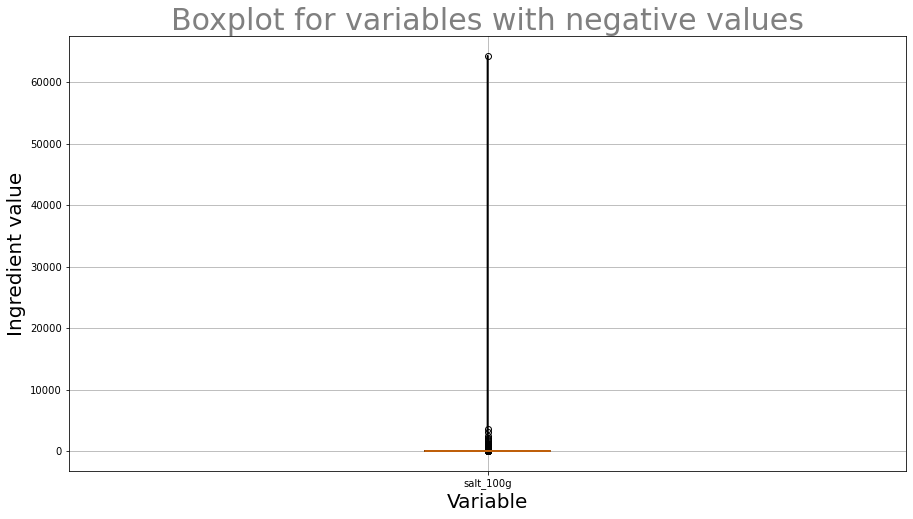

In [26]:
# Exemple des de la distribution des valeurs de la colonne 'salt'
ax = df3.salt_100g.plot(kind='box',
             color=dict(boxes='r', whiskers='r', medians='r', caps='r'),
             boxprops=dict(linestyle='-', linewidth=1.5),
             flierprops=dict(linestyle='-', linewidth=1.5),
             medianprops=dict(linestyle='-', linewidth=1.5),
             whiskerprops=dict(linestyle='-', linewidth=1.5),
             capprops=dict(linestyle='-', linewidth=1.5),
             showfliers=True, grid=True, rot=0,figsize = (15,8))
# set axes options      
ax.set_title("Boxplot for variables with negative values", fontsize=30, color='gray')
ax.set_xlabel('Variable', fontsize=20, color='black')
ax.set_ylabel('Ingredient value', fontsize=20, color='black')
# Ticks parameters
ax.tick_params(axis='y', labelsize=10,color='black')
ax.tick_params(axis='x', labelsize=10,color='black')
plt.show()

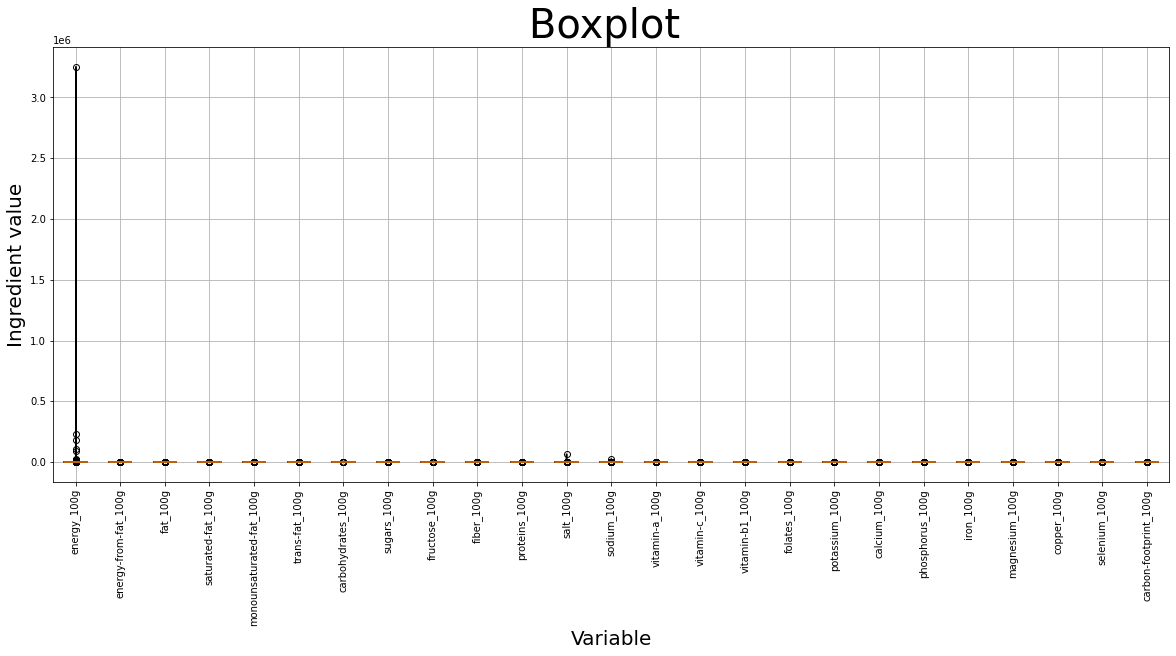

In [27]:
# Exemple des de la distribution des valeurs de la colonne 'energy'
ax = df3[outliers_list].plot(kind='box',
             color=dict(boxes='r', whiskers='r', medians='r', caps='r'),
             boxprops=dict(linestyle='-', linewidth=1.5),
             flierprops=dict(linestyle='-', linewidth=1.5),
             medianprops=dict(linestyle='-', linewidth=1.5),
             whiskerprops=dict(linestyle='-', linewidth=1.5),
             capprops=dict(linestyle='-', linewidth=1.5),
             showfliers=True, grid=True, rot=90, figsize = (20,8))
       
ax.set_title("Boxplot ", fontsize=40, color='black')
ax.set_xlabel('Variable', fontsize=20, color='black')
ax.set_ylabel('Ingredient value', fontsize=20, color='black')
plt.show()

In [ ]:
# Remplacement et corrections des outliers :
# Exemple de la colonne 'energy' qui ne doit pas depasser la valeur 900
# Le repmlacement ne sera pas fait sur l'ensemble du dataset vu que tout approche possible doit traiter les-
# valeurs par type de produit ce qui nous prendera trop de temps par rapport a l'objectif du projet
# Un remplacement sera prevu pour le produit choisit pour le reste du projet.

In [ ]:
# Fat description :  
#Fat is the most energy dense, at 9 kcal/gram. So your delicious meal of whale blubber would give you 900 kcal
# Le remplacement des ces valeurs devra se faire par type de produit.
# On procedera a la correction des valeurs de cette colonne pour le produit choisi

In [28]:
# Sauvegarde du fichier df3 / 
df3.to_csv('df_final.csv', index=False)